# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Iowa = pd.read_csv('data/iowa.csv')
Iowa.head()
Iowa.shape


(159904, 14)

In [3]:
# profit is calculated as per unit revenue - per unit cost X quantity sold. There are three columns that give that information so the code is very logical
# Since we are looking at profit by Item Description, we will create a new column in the dataframe to hold profit values. It was hard to think of which column to group by, but since we are focused on types of liquor, Item Description made the most sense.
Iowa['Profit'] = (Iowa['State Bottle Retail'] - Iowa['State Bottle Cost']) * Iowa['Bottles Sold']
Iowa['Profit'] = Iowa['Profit'].round(2)

# total profit by Item Description 
profit = (
    Iowa.groupby('Item Description')['Profit']
              .sum()
              .reset_index()
)

# top 5 most profitble items. 
top5 = profit.sort_values('Profit', ascending=False).head(5)
print(top5)
# Iowa.head()

               Item Description     Profit
5022       TITOS HANDMADE VODKA  364074.35
636                BLACK VELVET  274676.85
1854  FIREBALL CINNAMON WHISKEY  187535.22
1323                CROWN ROYAL  160981.95
1358    CROWN ROYAL REGAL APPLE  122880.40


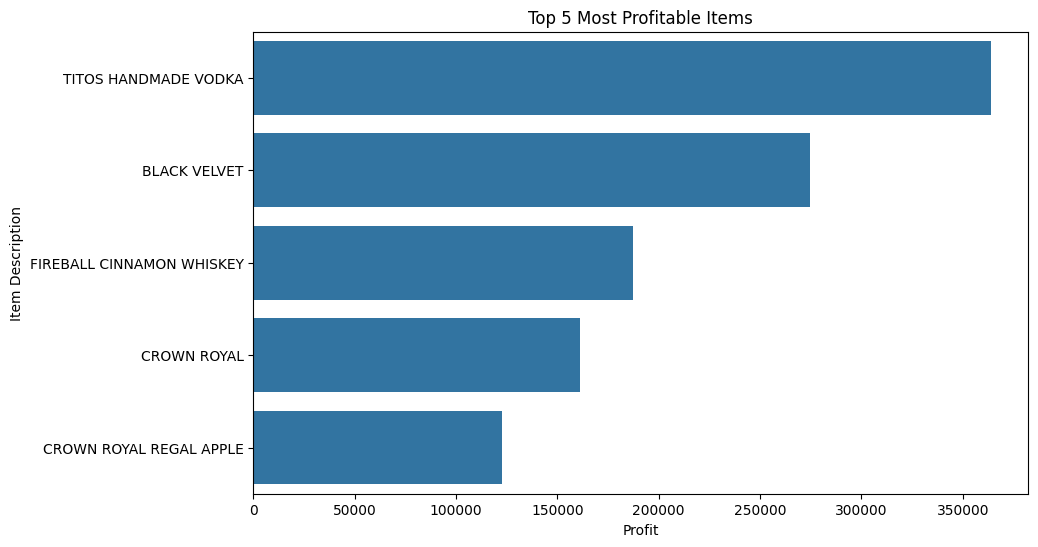

In [4]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='Item Description', data=top5)
plt.title('Top 5 Most Profitable Items')
plt.show()

# Titos has the highest profit margin. 

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [61]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

Subtraction = x - y
print(Subtraction)

# I run into an error because the shapes of the two arrays are not the same, making this computation not possible

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [52]:
print(x)
print(y)
print(x.shape)  # 1 d array with 3 elements
print(y.shape) # 1 d array with 2 elements
print(type(x))
print(type(y))

[1 3 5]
[2 5]
(3,)
(2,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [53]:
x_modfied = x.reshape(-1,1)
y_modified = y.reshape(1,-1)

print(x_modfied)
print(y_modified)
print(x_modfied.shape) # 2 d array with 3 rows and 1 column
print(y_modified.shape) # 2 d array with 1 row and 2 columns
print(type(x_modfied))
print(type(y_modified))



[[1]
 [3]
 [5]]
[[2 5]]
(3, 1)
(1, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
x.reshape(-1,1)-y.reshape(1,-1) # as you can see both arrays are now 2d and the subtraction is possible based on broadcasting rules. 

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [64]:
x_modfied = x.reshape(1,-1)
y_modified = y.reshape(-1,1)

print(x_modfied)
print(y_modified)
print(x_modfied.shape) # 2 d array with 1 rows and 3 columns
print(y_modified.shape) # 2 d array with 2 rows and 1 column
print(type(x_modfied))
print(type(y_modified))

[[1 3 5]]
[[2]
 [5]]
(1, 3)
(2, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
x.reshape(1,-1)-y.reshape(-1,1) # this also works, the shapes are now 1x3 and 2x1 respectively (the flip from the first reshape)and the subtraction is possible based on broadcasting rules.

array([[-1,  1,  3],
       [-4, -2,  0]])

In [57]:
import numpy as np

# Here I define the arrays
x = np.array([1,3,5])
y = np.array([2,5])


result1 = []
for i in range(len(x)):
    result1.append(x.reshape(-1,1)[i] - y.reshape(1,-1))


result2 = []
for i in range(len(y)):
    result2.append(x.reshape(1,-1) - y.reshape(-1,1)[i])


print(result1)
print(result2)

[array([[-1, -4]]), array([[ 1, -2]]), array([[3, 0]])]
[array([[-1,  1,  3]]), array([[-4, -2,  0]])]


In [ ]:
# As we learned in linear alegbra, we can only perform certain math operations if the shapes and dimensions of the arrays are compatible.
# In this case, the two arrays have different shapes (3 elements vs 2 elements), so we cannot directly subtract them.
# However, by reshaping the arrays to be 2-dimensional, we can use broadcasting to perform the subtraction.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

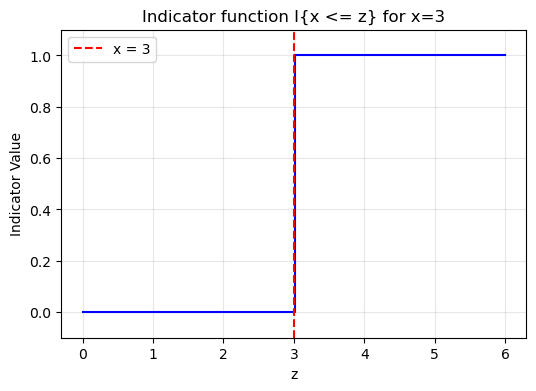

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = 3

z = np.linspace(0, 6, 200)


indicator = (x <= z).astype(int)

plt.figure(figsize=(6,4))
plt.step(z, indicator, where="post", color="blue")
plt.axvline(x, color="red", linestyle="--", label=f"x = {x}")

plt.title("Indicator function I{x <= z} for x=3")
plt.xlabel("z")
plt.ylabel("Indicator Value")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



The indicator function ($\mathbb{I}\{x \leq z\}$) compares the x and z values, and gives a 1 (yes/true) if x is less than or equal to z, and a 0 (no/false) if x is greater than z. Because  x = 3, It takes on 0 for z < 3, and 1 for z >= 3. Because they are complements of each other, 1- $\mathbb{I}\{x \leq z\}$ = $\mathbb{I}\{x > z\}$ stands. 

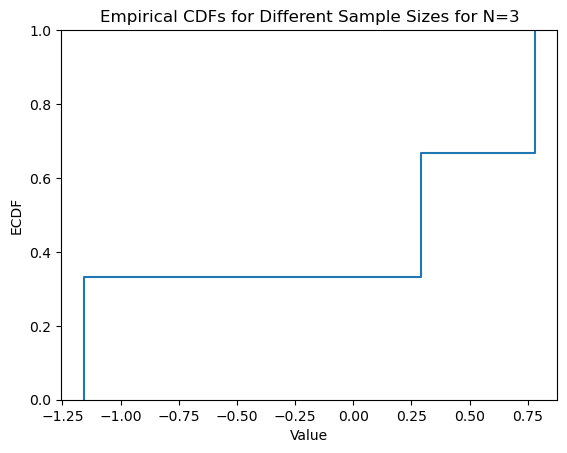

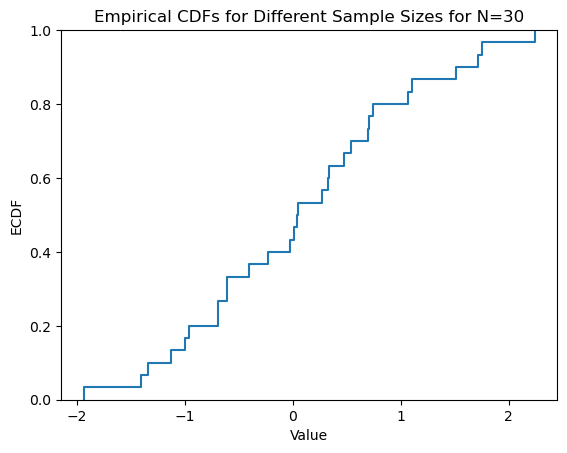

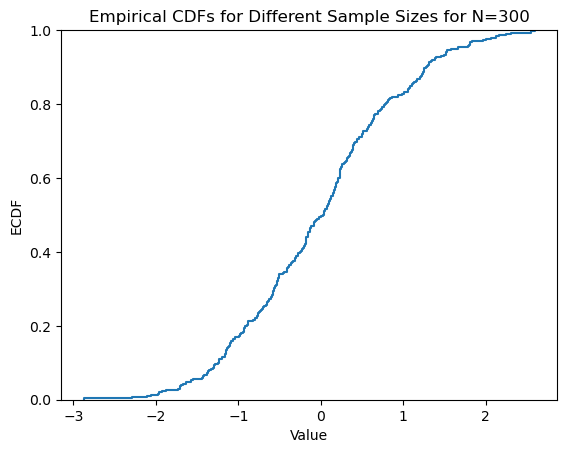

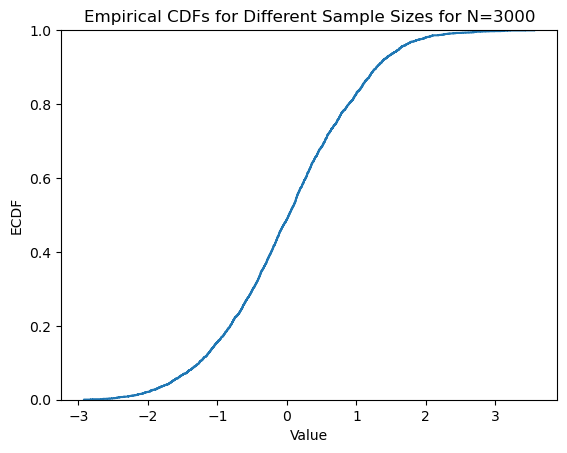

In [45]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    sns.ecdfplot(X)
    plt.xlabel("Value")
    plt.ylabel("ECDF")
    plt.title('Empirical CDFs for Different Sample Sizes for N=' + str(N))
    plt.show()

# based on the plots, as the sample size increases, the empirical CDF becomes smoother and more closely approximates the theoretical CDF of a normal distribution.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [34]:
def custom_quantile(data, q):
    data_sorted = sorted(data)
    index = (q * (len(data_sorted) - 1))
    lower_index = int(index)
    if index == lower_index:
        return data_sorted[lower_index]
    else:
        return (data_sorted[lower_index] + data_sorted[lower_index+1]) / 2

In [35]:
def compute_iqr_and_whiskers(data):
    
    q1 = custom_quantile(data, 0.25)
    q3 = custom_quantile(data, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    return iqr, lower_whisker, upper_whisker

In [36]:
def compute_five_number_summary_and_whiskers(data):
    
   
    min_value = min(data)
    q1 = custom_quantile(data, 0.25)
    median = custom_quantile(data, 0.5)
    q3 = custom_quantile(data, 0.75)
    max_value = max(data)
    lower_whisker = q1 - 1.5 * (q3 - q1) # IQR
    upper_whisker = q3 + 1.5 * (q3 - q1) # IQR
    
    return (min_value, q1, median, q3, max_value), lower_whisker, upper_whisker

In [37]:
def find_outliers(data, lower_whisker, upper_whisker):
    return [x< lower_whisker or x > upper_whisker for x in data ] # returns a boolean list (true or false) based on whether the value is less than the lower whisker or greater than the upper whisker


In [5]:
Prices = pd.read_csv('data/ames_prices.csv') # decided to use the price column from the price dataset as it has a good range of values and is relevant to real estate analysis.
Prices['price'].info()
Prices['price'].head()
Prices['price'].describe()



<class 'pandas.core.series.Series'>
RangeIndex: 2930 entries, 0 to 2929
Series name: price
Non-Null Count  Dtype
--------------  -----
2930 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [39]:
 # Here I apply the custom quantile function to find the 25th, 50th, and 75th percentiles of the 'price' column in the Prices DataFrame.
Price_25 = custom_quantile(Prices['price'], 0.25)
Price_50 = custom_quantile(Prices['price'], 0.50)
Price_75 = custom_quantile(Prices['price'], 0.75)
print(Price_25, Price_50, Price_75)

129500.0 160000.0 213500.0


In [40]:
Computing_IQR_Whiskers = compute_iqr_and_whiskers(Prices['price'])
print(Computing_IQR_Whiskers)

(84000.0, 3500.0, 339500.0)


In [41]:
Computing_five_summary_and_whiskers = compute_five_number_summary_and_whiskers(Prices['price'])
print(Computing_five_summary_and_whiskers)

((12789, 129500.0, 160000.0, 213500.0, 755000), 3500.0, 339500.0)


In [42]:
q1 = custom_quantile(Prices['price'], 0.25)
q3 = custom_quantile(Prices['price'], 0.75)
    
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

outliers = find_outliers(Prices['price'], lower_whisker, upper_whisker)
count_outliers = sum(outliers)   # True counts as 1, False as 0
print(count_outliers)



137


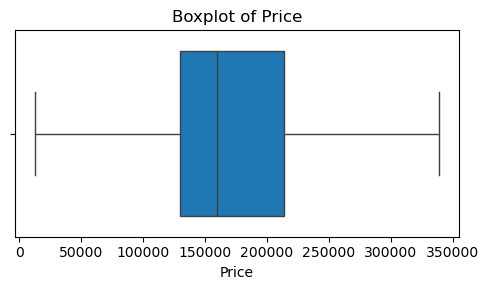

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.boxplot(x=Prices['price'], showfliers=False, whis=1.5, saturation=1)

plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.tight_layout()
plt.show()



In [44]:
Prices['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

Based my analysis, the numbers line up with the boxplot and the describe function.. Having created all these function, appreciate using the built in functions for my analysis. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?